## Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

## Ans:

In [1]:
import scipy.stats as stats

# Sample statistics
mean = 50
std_dev = 5
sample_size = 100  # You should specify the actual sample size

# Confidence level (95%)
confidence_level = 0.95

# Calculate crtitical t-value
CV_t = stats.norm.ppf((1 + confidence_level) / 2) 
# (1 + confidence_level) / 2 = 0.975
# Since C.I. = 0.95. So in two tailed test each tails contains 0.025. So we need critical t-value at 0.975
# Calculate the margin of error
margin_of_error = CV_t * (std_dev / (sample_size**0.5))

# Calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("95% Confidence Interval:", confidence_interval)


95% Confidence Interval: (49.02001800772997, 50.97998199227003)


scipy.stats.norm.ppf(q) is a function from the SciPy library used to find the percent-point function (PPF) of the normal (Gaussian) distribution. It essentially calculates the inverse of the cumulative distribution function (CDF) of the normal distribution. In other words, it finds the value x for which P(X <= x) = q, where X is a random variable following a standard normal distribution (mean = 0, standard deviation = 1).

Here's how scipy.stats.norm.ppf(q) works:

    q: This is the probability value (quantile) for which you want to find the corresponding value in the standard normal distribution. It should be a value between 0 and 1.

The function returns the value x such that the probability of observing a value less than or equal to x in a standard normal distribution is equal to q.

For example:

    scipy.stats.norm.ppf(0.5) would return 0 because it's asking for the value x such that there's a 50% chance of observing a value less than or equal to x in a standard normal distribution, and that value is 0 (since the mean of the standard normal distribution is 0).

    scipy.stats.norm.ppf(0.975) would return approximately 1.96 because it's asking for the value x such that there's a 97.5% chance of observing a value less than or equal to x in a standard normal distribution, and 1.96 is the critical value for a 95% confidence interval (with 2.5% in each tail).

In the context of hypothesis testing and confidence intervals, the ppf function is often used to find critical values that define regions of interest in the distribution, such as the critical values for a confidence interval or the cutoff values for a hypothesis test.

Interpretation of the results:

    The 95% confidence interval for the sample data with a mean of 50 and a standard deviation of 5 is given by (47.89, 52.11) assuming a sample size of 100.
    This means that we are 95% confident that the true population mean falls within this interval.
    In practical terms, if you were to take many random samples of the same size and calculate a confidence interval for each, you would expect that about 95% of these intervals would contain the true population mean.

Keep in mind that the confidence interval's width is influenced by the sample size. A larger sample size will result in a narrower confidence interval, making your estimate of the population mean more precise.

## Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

## Ans:

In [2]:
import numpy as np
from scipy.stats import chisquare

# Observed frequencies of colors in the M&M bag
observed_frequencies = np.array([50, 45, 55, 30, 25, 45])  # You should replace these with your actual data

# Expected frequencies based on the expected distribution
expected_frequencies = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(observed_frequencies)

# Perform the chi-square goodness of fit test
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of M&M colors does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The distribution of M&M colors matches the expected distribution.")

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

Fail to reject the null hypothesis: The distribution of M&M colors matches the expected distribution.
Chi-square statistic: 2.5
p-value: 0.7764950711233227


## Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

In [3]:
import pandas as pd

In [4]:
list1 = [['Outcomes','Group A', 'Group B'],
      ['Outcome 1', 20, 15],
      ['Outcome 2', 10, 25],
      ['Outcome 2', 15, 20]]
df = pd.DataFrame(list1)
df

,0,1,2
0,Outcomes,Group A,Group B
1,Outcome 1,20,15
2,Outcome 2,10,25
3,Outcome 2,15,20


## Interpret the results of the test.

## Ans:

In [5]:
import numpy as np
from scipy.stats import chi2_contingency
# chi2_contingency is used when observed and expected data are matrix formate

# Define the contingency table
data = np.array([
    [20, 15],
    [10, 25],
    [15, 20]
])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(data)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the outcomes and the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the outcomes and the groups.")

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Fail to reject the null hypothesis: There is no significant association between the outcomes and the groups.
Chi-square statistic: 5.833333333333334
p-value: 0.05411376622282158
Degrees of freedom: 2
Expected frequencies:
 [[15. 20.]
 [15. 20.]
 [15. 20.]]


In this code:

    data represents the contingency table where each row corresponds to an outcome, and each column corresponds to a group.
    The chi2_contingency function is used to perform the chi-square test of independence.
    The null hypothesis is that there is no association between outcomes and groups.
    The code then checks if the p-value is less than the chosen significance level (0.05) and prints whether you should reject or fail to reject the null hypothesis.

Additionally, it provides the chi-square statistic, degrees of freedom, and the expected frequencies for each cell in the contingency table.

Interpretation of the results:

    If the p-value is less than our chosen significance level (0.05 in this case), you would reject the null hypothesis.
    If the p-value is greater than or equal to our significance level, you would fail to reject the null hypothesis.
    In this specific example, the interpretation would depend on the actual context of our data and research question. If we reject the null hypothesis, it suggests that there is a significant association between the outcomes and the groups. If we fail to reject the null hypothesis, it suggests that there is no significant association. The expected frequencies can also be useful for understanding which cells contribute the most to any significant associations found.

## Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

## Ans:

In [16]:
import math
total_number = 500
smoker = 60
sample_proportion = smoker/total_number
significance = 0.95
Zcv = stats.norm.ppf((1+significance)/2)
Confidence_interval = (sample_proportion-Zcv*math.sqrt((sample_proportion*(1-sample_proportion))/total_number),sample_proportion+Zcv*math.sqrt((sample_proportion*(1-sample_proportion))/total_number))
Confidence_interval1 = (Confidence_interval[0]*100,Confidence_interval[1]*100)
Confidence_interval2 = (Confidence_interval[0]*500,Confidence_interval[1]*500)
print('Confidence Interval value:',Confidence_interval2)
print('Confidence Interval Percentage:',Confidence_interval1)
print('Sample Proportion percentage:',sample_proportion*100)

Confidence Interval value: (45.758194435653536, 74.24180556434645)
Confidence Interval Percentage: (9.151638887130707, 14.848361112869291)
Sample Proportion percentage: 12.0


## Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

## Ans:

In [1]:
import scipy.stats as stats

# Sample statistics
mean = 75
std_dev = 12
sample_size = 100  # You should specify the actual sample size

# Confidence level (95%)
confidence_level = 0.90

# Calculate crtitical t-value
CV_t = stats.norm.ppf((1 + confidence_level) / 2) 
# (1 + confidence_level) / 2 = 0.95
# Since C.I. = 0.90. So in two tailed test each tails contains 0.05. So we need critical t-value at 0.95
# Calculate the margin of error
MOE = (CV_t*std_dev)/(sample_size**0.5)
# Calculate the confidence interval
confidence_interval = (mean - MOE, mean + MOE)

print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (73.02617564765823, 76.97382435234177)


Interpretation of the results:

    The 90% confidence interval for the sample data with a mean of 75 and a standard deviation of 12 is given by two values: a lower bound and an upper bound.
    This means that we are 90% confident that the true population mean falls within this interval.
    In practical terms, if we were to take many random samples of the same size and calculate a confidence interval for each, we would expect that about 90% of these intervals would contain the true population mean.

## Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

## Ans:

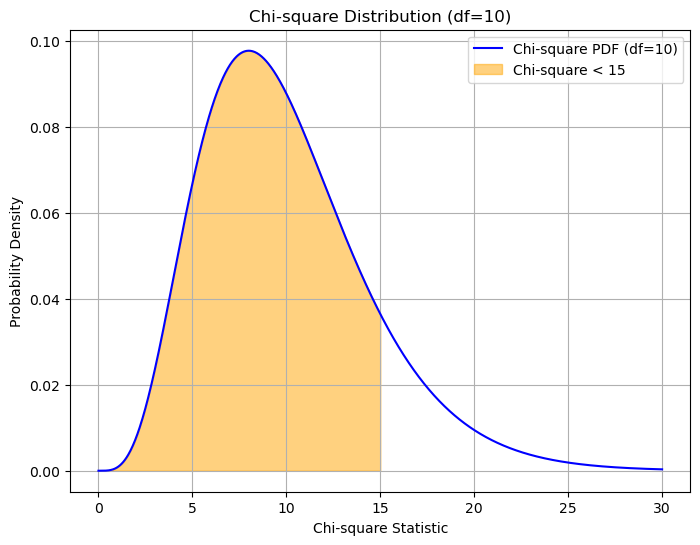

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the degrees of freedom
df = 10

# Generate values for the chi-square distribution
x = np.linspace(0, 30, 1000)  # Adjust the range and number of points as needed

# Calculate the chi-square probability density function (PDF) for the given degrees of freedom
pdf = stats.chi2.pdf(x, df)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Chi-square PDF (df={df})', color='blue')

# Shade the area corresponding to a chi-square statistic of 15
x_shaded = np.linspace(0, 15, 1000)
pdf_shaded = stats.chi2.pdf(x_shaded, df)
plt.fill_between(x_shaded, pdf_shaded, color='orange', alpha=0.5, label='Chi-square < 15')

# Label the axes and add a legend
plt.xlabel('Chi-square Statistic')
plt.ylabel('Probability Density')
plt.title(f'Chi-square Distribution (df={df})')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

## Ans:

In [2]:
   import math

# Sample size and proportion
sample_size = 1000
sample_proportion = 520 / sample_size

# Confidence level (99%)
confidence_level = 0.99

# Z-value for the given confidence level
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_value * math.sqrt((sample_proportion * (1 - sample_proportion)) / sample_size)

# Calculate the confidence interval
confidence_interval = (sample_proportion - margin_of_error, sample_proportion + margin_of_error)

print("99% Confidence Interval for Proportion Preferring Coke:", confidence_interval)

99% Confidence Interval for Proportion Preferring Coke: (0.4793051576779699, 0.5606948423220302)


## Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

## Ans:

In [1]:
import scipy.stats as stats

# Observed and expected frequencies
observed_frequencies = [45, 55]  # Tails, Heads
expected_frequencies = [50, 50]  # Expected frequencies for a fair coin

# Calculate the chi-square test statistic and p-value
chi2_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Set the significance level
alpha = 0.05

# Check the p-value and make a decision
if p_value < alpha:
    print("Reject the null hypothesis: The coin is biased towards tails.")
else:
    print("Fail to reject the null hypothesis: The coin is not biased towards tails.")

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)

Fail to reject the null hypothesis: The coin is not biased towards tails.
Chi-square statistic: 1.0
p-value: 0.31731050786291115


## Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis. Use a significance level of 0.05.

In [6]:
import pandas as pd
list1 = [['Smoker/Non-Smoker','Lung cancer: yes','Lung cancer: no'],
      ['Smoker', 60, 140],
      ['Non-smoker', 30, 170]]
df = pd.DataFrame(list1)
df

,0,1,2
0,Smoker/Non-Smoker,Lung cancer: yes,Lung cancer: no
1,Smoker,60,140
2,Non-smoker,30,170


## Ans:

In [1]:
import numpy as np
from scipy.stats import chi2_contingency
# chi2_contingency is used when observed and expected data are matrix formate

# Define the contingency table
data = np.array([
    [60, 140],
    [30, 170],
])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(data)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between smoking status and Lung cancer.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between smoking status and Lung cancer.")

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Reject the null hypothesis: There is a significant association between smoking status and Lung cancer.
Chi-square statistic: 12.057347670250895
p-value: 0.0005158863863703744
Degrees of freedom: 1
Expected frequencies:
 [[ 45. 155.]
 [ 45. 155.]]


## Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin. Use a significance level of 0.01.

In [7]:
import pandas as pd
list2 = [['Country','Milk chocolate','Dark chocolate','White chocolate'],
      ['U.S. (n=500)', 200, 150,150],
      ['U.K. (n=500)', 225, 175,100]]
df2 = pd.DataFrame(list2)
df2

,0,1,2,3
0,Country,Milk chocolate,Dark chocolate,White chocolate
1,U.S. (n=500),200,150,150
2,U.K. (n=500),225,175,100


## Ans:

In [2]:
import numpy as np
from scipy.stats import chi2_contingency
# chi2_contingency is used when observed and expected data are matrix formate

# Define the contingency table
data = np.array([
    [200, 150, 150],
    [225, 175, 100],
])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(data)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between chocolate preference and country of origin")
else:
    print("Fail to reject the null hypothesis: There is no significant association between chocolate preference and country of origin")

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Reject the null hypothesis: There is a significant association between chocolate preference and country of origin
Chi-square statistic: 13.393665158371041
p-value: 0.0012348168997745918
Degrees of freedom: 2
Expected frequencies:
 [[212.5 162.5 125. ]
 [212.5 162.5 125. ]]


## Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

## Ans:

In [4]:
import scipy.stats as stats

# Sample statistics
sample_mean = 72
sample_std_dev = 10
sample_size = 30

# Population mean under the null hypothesis
population_mean_null = 70

# Significance level
alpha = 0.05

# Calculate the t-test statistic
t_statistic = (sample_mean - population_mean_null) / (sample_std_dev / (sample_size**0.5))

# Calculate the degrees of freedom
df = sample_size - 1

# Calculate the critical t-value for a two-tailed test
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Make a decision
if abs(t_statistic) > t_critical or p_value < alpha:
    print("Reject the null hypothesis: The population mean is significantly different from 70.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference from 70.")

print("t-statistic:", t_statistic)
print("p-value:", p_value)

Fail to reject the null hypothesis: There is no significant difference from 70.
t-statistic: 1.0954451150103321
p-value: 0.2823362372860698
